# <font color=lightblue>Directed Analysis</font>

**This notebook is a continuation from the exploratory analysis in `exploratory_analysis.ipynb`**

In [82]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

#load in data for this analysis
data = pd.read_csv('data_cleaned.csv', parse_dates=['date'])

# <font color=green>What is the impact of genre on the popularity of TV dramas?</font>

This section will be using regression analysis to find the relationship between genres and `av_rating`. Linear regression will be used to predict average rating of series, with the genre columns being the independent variables. The coefficients of the different drama genres will then be analyzed to find possible effects of the genre on the rating.

In [83]:
#dependent variables
genres = [col for col in data.columns if 'genre' in col]
X = data[genres]

#target var
y = data['av_rating']

#model
model = LinearRegression()

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#fit model
model.fit(X_train, y_train)

#predict with model
y_pred = model.predict(X_test)

#find mse and r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 0.3389835013347268
R-squared: -0.03302653142376566


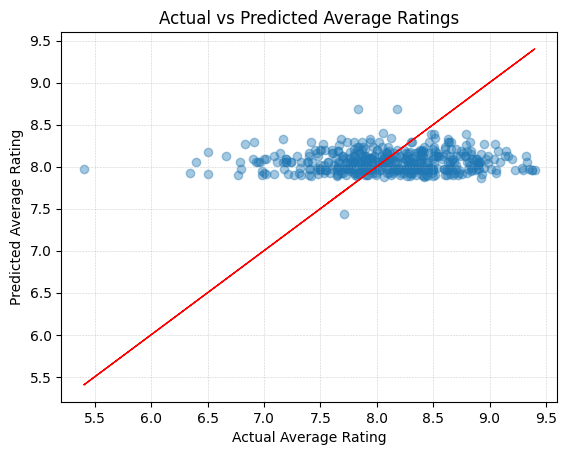

In [84]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Average Rating')
plt.ylabel('Predicted Average Rating')
plt.title('Actual vs Predicted Average Ratings')
plt.plot(y_test, y_test, color='red', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.6)
plt.show()

In [85]:
#examine coefficients
coefs = pd.DataFrame({'genre': X.columns, 'coefficient': model.coef_})#.style.background_gradient(subset=['coefficient'], cmap='RdBu')
coefs.to_csv('coefs.csv', index=False)
coefs.style.background_gradient(subset=['coefficient'], cmap='RdBu')

,genre,coefficient
0,genre_Action,0.039553
1,genre_Adventure,-0.021233
2,genre_Animation,-0.007114
3,genre_Biography,0.078446
4,genre_Comedy,0.016908
5,genre_Crime,0.128141
6,genre_Documentary,-0.565442
7,genre_Family,0.069324
8,genre_Fantasy,0.238582
9,genre_History,0.294575


## <font color=red>Conclusion and Findings</font>

The results of this analysis show that there are extremely marginal changes in average rating due to genre alone. However, this is not the case for the reality-tv genre. The coefficients displayed indicate how much average rating is expected to change due to the genre being present, and reality-tv is `-3.810`. This means that a series being reality tv is expected to lower the average rating by 3.8 points. While the other genres do not have as high coefficients, this indicates a significant impact by this genre, meaning that genre can greatly impact the average rating.

## <font color=green>Can the rating of a TV drama be predicted based on its genre and other factors?</font>

This section will explore how well the average rating can be predicted using machine learning models. The target variable will be the average rating, while the independent variables are the genre columns, year, month, and quality. Several different models will be used:

* Linear Regression
* Decision Tree Regressor
* K Nearest Neighbors Regressor
* AdaBoost Regressor
* Random Forest Regressor
* Gradient Boosting Regressor

These models' outputs and performances will all be compared using the r2 score and mean squared error. The best model will be chosen using both of these metrics

In [86]:
#set dependent independent variables to everything but non numeric features and av_rating
X = data.drop(['av_rating', 'titleId', 'title', 'date'], axis=1)

#target is average rating
y = data['av_rating']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#initialize models
models = [RandomForestRegressor(random_state=8), AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=8)), 
          GradientBoostingRegressor(random_state=8), LinearRegression(), DecisionTreeRegressor(random_state=8), 
          KNeighborsRegressor()]
names = ['RandomForest', 'AdaBoost', 'GradientBoosting', 'LinearRegression', 'DecisionTreeRegressor', 'KNeighbors']

#create dataframe to compare different models
scores = pd.DataFrame(columns=['model', 'r2_score', 'mse'])

#create run models
for i in range(len(models)):
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    row = [names[i]]
    row.append(r2_score(y_test, y_pred))
    row.append(mean_squared_error(y_test, y_pred))
    scores.loc[len(scores.index)] = row

scores.to_csv('scores.csv', index=False)
scores.style.highlight_min(subset=['mse'], color='green').background_gradient(subset=['r2_score'])

,model,r2_score,mse
0,RandomForest,0.528180,0.154826
1,AdaBoost,0.500526,0.163900
2,GradientBoosting,0.574961,0.139475
3,LinearRegression,0.523153,0.156476
4,DecisionTreeRegressor,0.249185,0.246377
5,KNeighbors,0.364210,0.208632


## <font color=red>Conclusion and Findings</font>

After evaluating all of the models, the best model is clearly the Gradient Boosting Regressor, with an r2 score of `0.575`, and a mean squared error of `0.139`. This r2 score means that the model predicts the outcome about ~58% of the target variable, which is not very accurate. This indicates that more data is needed to predict the average score for a given series.



## <font color=green>Can distinct clusters be found of dramas based on genre preferences and ratings?</font>

This section will be using Kmeans clustering to find clusters within the tv series. The variables included will be all genre columns and the average rating column. PCA will be used for feature selection. The clusters will be evaluated afterwards, and the key differences will be analyzed.


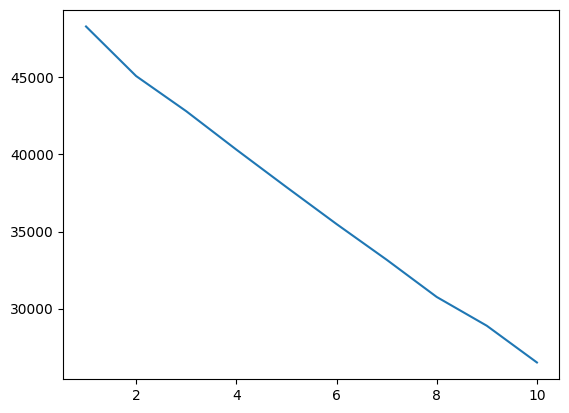

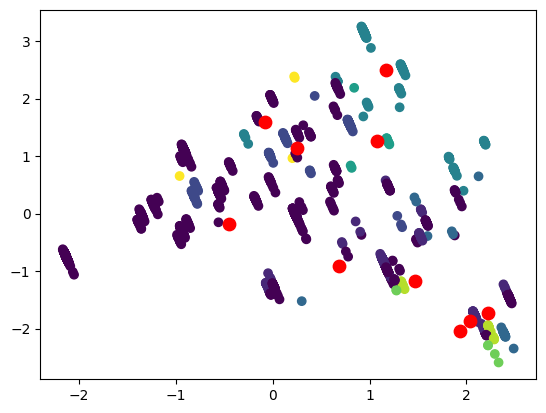

,0,1,2,3,4,5,6,7,8,9
label,0.000000,1.000000,2.000000,3.000000,4.000000,5.00000,6.00,7.000000,8.000000,9.000000
genre_Action,0.162904,0.009346,0.008130,0.055556,0.551724,0.10000,0.00,0.000000,0.000000,0.500000
genre_Adventure,0.000000,0.000000,0.000000,0.027778,1.000000,0.00000,0.00,0.000000,0.000000,0.000000
genre_Animation,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000
genre_Biography,0.015253,0.000000,0.000000,0.000000,0.019704,0.00000,0.00,0.000000,0.000000,0.000000
genre_Comedy,0.231239,0.355140,0.016260,0.777778,0.083744,0.00000,0.00,0.333333,0.413793,0.000000
genre_Crime,0.492373,0.018692,0.073171,0.027778,0.000000,0.00000,0.00,0.000000,0.000000,0.250000
genre_Documentary,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,1.000000
genre_Family,0.034777,0.032710,0.000000,0.000000,0.059113,0.00000,0.00,0.000000,0.000000,0.000000
genre_Fantasy,0.081147,0.023364,0.455285,0.055556,0.133005,0.00000,0.00,0.000000,0.000000,0.000000


In [90]:
#variables used for kmeans analysis
genres = [col for col in data.columns if 'genre' in col]
genres.append('av_rating')
X = data[genres]

#scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

#pca
pca = PCA()
pca.fit(data_scaled)

#find n_components for a 95% variance threshold
cum_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.95
n_components = np.searchsorted(cum_variance, threshold) + 1

#pca with new n components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

#scree plot
vals = []
for i in range(1,11):    
    model = KMeans(n_clusters=i, random_state=8)
    model.fit(data_pca)
    vals.append(model.inertia_)

plt.plot(range(1,11), vals)
plt.show()

#10 clusters is optimal
n_clusters = 10

#create kmeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=8)
kmeans.fit(data_pca)

#find centroids
centers = kmeans.cluster_centers_

#plot centroids
plt.scatter(data_pca[:,0], data_pca[:,1], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=80)
plt.show()

X['label'] = kmeans.labels_
genres.append('label')
centroids = X[genres].groupby('label', as_index=False).mean()
centroids.transpose()

In [88]:
#export centroids csv
centroids.transpose().to_csv('centroids.csv')

## <font color=red>Conclusion and Findings</font>

After completing Kmeans analysis, there are 10 clusters. This is not unexpected, as there are several niche genres and subgenres which could present themselves as any combination of genres. For example, several different clusters have >0 values in comedy, showing the different possible combinations. This analysis is definitely a success, as the groups are easily seen upon close inspection, and a possible category can be imagined for each cluster.